### Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import matplotlib.colors as mcolors

### Step 1 - Parse the outputs from the MUX4111-WHH1754.wgs_metrics.txt file in order to obtain a table with the following information: library id, PCT_1X, MEAN_COVERAGE

In [4]:
# Create an empty dictionary to store outputs
output = {'library_id': [], 'mean_coverage': [], 'pct_1x': []}

# Initialize the indices of the mean coverage and pct 1x
mean_coverage_index = 0
pct_1x_index = 0


with open('MUX4111-WHH1754.wgs_metrics.txt', 'r') as f:
       for i,line in enumerate(f):
        if "INPUT=MUX4111-WHH1754.bam" in line:
            # Extract the library ID 
            library_id = line.split('-')[1].split('.')[0]
        if not line.startswith("#") and line != '\n':
            data = line.split("\n")[0].split("\t")
            try:
                if not len(data) <= 2:
                    float_list = [float(x) for x in data]
                    # Add data to dictionary
                    output['library_id'].append(library_id)
                    output['mean_coverage'].append(float_list[mean_coverage_index])
                    output['pct_1x'].append(float_list[pct_1x_index])
            except:
                mean_coverage_index = data.index('mean_coverage'.upper())
                pct_1x_index = data.index('pct_1x'.upper())

#Convert dictionary to dataframe
df = pd.DataFrame.from_dict(output)

In [5]:
df

,library_id,mean_coverage,pct_1x
0,WHH1754,12.00191,0.92263


In [6]:
#Convert to csv
filename = 'metrics.csv'

df = pd.DataFrame.from_dict(output)

df.to_csv(filename, index=False)

### Step 2 - Combine the data from sample_metadata.csv and sample_metrics.csv to form a single dataset

In [7]:
#Read in csv files
df1 = pd.read_csv('sample_metadata.csv')
df2 = pd.read_csv('sample_metrics.csv')

#merge datasets on library_id
df = pd.merge(df1, df2, on='library_id', how="left")

In [8]:
display(df)

,library_id,mux_id,supplied_gender,library_prep,sequenced_datetime,mean_coverage,pct_1x
0,WHH1000,MUX3529,F,Nano,2016-03-21T14:47:27Z,13.62277,92.3796
1,WHH1001,MUX3529,M,Nano,2016-03-21T14:47:27Z,12.70815,92.8131
2,WHH1002,MUX3529,F,PCR-Free,2016-03-21T14:47:27Z,12.20586,92.2488
3,WHH1003,MUX3529,F,PCR-Free,2016-03-21T14:47:27Z,13.73929,92.3300
4,WHH1004,MUX3529,F,PCR-Free,2016-03-21T14:47:27Z,13.79641,92.3624
...,...,...,...,...,...,...,...
1529,WHH995,MUX3529,F,PCR-Free,2016-03-21T14:47:27Z,13.14050,92.3117
1530,WHH996,MUX3529,M,PCR-Free,2016-03-21T14:47:27Z,11.47538,92.8031
1531,WHH997,MUX3529,F,PCR-Free,2016-03-21T14:47:27Z,11.78446,92.1867
1532,WHH998,MUX3529,M,PCR-Free,2016-03-21T14:47:27Z,11.88532,92.8426


### Step 3 Using your newly created dataset, plot the PCT_1X metric by mux_id in a way that meaningfully represents the data.

In [9]:
#Remove rows with NaN values
df = df.dropna()

In [10]:
#display dataset
df.head()

,library_id,mux_id,supplied_gender,library_prep,sequenced_datetime,mean_coverage,pct_1x
0,WHH1000,MUX3529,F,Nano,2016-03-21T14:47:27Z,13.62277,92.3796
1,WHH1001,MUX3529,M,Nano,2016-03-21T14:47:27Z,12.70815,92.8131
2,WHH1002,MUX3529,F,PCR-Free,2016-03-21T14:47:27Z,12.20586,92.2488
3,WHH1003,MUX3529,F,PCR-Free,2016-03-21T14:47:27Z,13.73929,92.3300
4,WHH1004,MUX3529,F,PCR-Free,2016-03-21T14:47:27Z,13.79641,92.3624


In [11]:
group_by_frame = df.groupby('mux_id')

In [13]:
group_by_frame.mean()

C:\Users\mxt5303\AppData\Local\Temp\ipykernel_63360\4024548864.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_frame.mean()


,mean_coverage,pct_1x
mux_id,,
MUX3275,10.973568,92.430874
MUX3316,12.434068,92.571389
MUX3359,11.400725,92.561914
MUX3381,12.956888,92.551687
MUX3434,12.705463,92.559776
MUX3529,12.629545,92.504037
MUX3936,12.402806,92.545317
MUX3949,13.032410,92.521169
MUX3969,11.967530,92.457133


In [14]:
# Get the stats of pct_1x by group
grouped_data = df.groupby("mux_id").agg(mean_pct=("pct_1x", "mean"), std_pct=("pct_1x", "std")).reset_index()
print(grouped_data)

# Get the range, maximum, minimum value and standard deviation of the mean_pct column in grouped_data
mean_range = grouped_data["mean_pct"].max() - grouped_data["mean_pct"].min()
mean_group_max = grouped_data["mean_pct"].max()
mean_group_min = grouped_data["mean_pct"].min()
mean_group_std = grouped_data["std_pct"].mean()
mean_group_median = grouped_data["mean_pct"].median()
mean_pct_mean = grouped_data["mean_pct"].mean()

# Print the results
print("Mean Group Range:", round(mean_range, 4))
print("Mean Group Maximum:", round(mean_group_max, 4))
print("Mean Group Minimum:", round(mean_group_min, 4))
print("Mean Group Standard Deviation:", round(mean_group_std, 4))
print("Mean Group Median:", round(mean_group_median, 4))
print("Mean PCT_1x value:", round(mean_pct_mean, 4))

     mux_id   mean_pct   std_pct
0   MUX3275  92.430874  0.314462
1   MUX3316  92.571389  0.266148
2   MUX3359  92.561914  0.268056
3   MUX3381  92.551687  0.270634
4   MUX3434  92.559776  0.263907
5   MUX3529  92.504037  0.266273
6   MUX3936  92.545317  0.266391
7   MUX3949  92.521169  0.261771
8   MUX3969  92.457133  0.259319
9   MUX3971  92.513241  0.258903
10  MUX4050  92.458931  0.251064
11  MUX4068  92.468873  0.253737
12  MUX4095  92.484314  0.268640
13  MUX4111  92.543996  0.259999
14  MUX4112  92.366271  0.270062
15  MUX4127  92.559728  0.264593
16  MUX4150  92.543644  0.262560
Mean Group Range: 0.2051
Mean Group Maximum: 92.5714
Mean Group Minimum: 92.3663
Mean Group Standard Deviation: 0.2663
Mean Group Median: 92.5212
Mean PCT_1x value: 92.5084


In [15]:
# Compute the mean 
df_mean = df.groupby("mux_id")["pct_1x"].mean().reset_index()

# Sort in descending order
df_mean = df_mean.sort_values("pct_1x", ascending=False)

df_mean

,mux_id,pct_1x
1,MUX3316,92.571389
2,MUX3359,92.561914
4,MUX3434,92.559776
15,MUX4127,92.559728
3,MUX3381,92.551687
6,MUX3936,92.545317
13,MUX4111,92.543996
16,MUX4150,92.543644
7,MUX3949,92.521169
9,MUX3971,92.513241


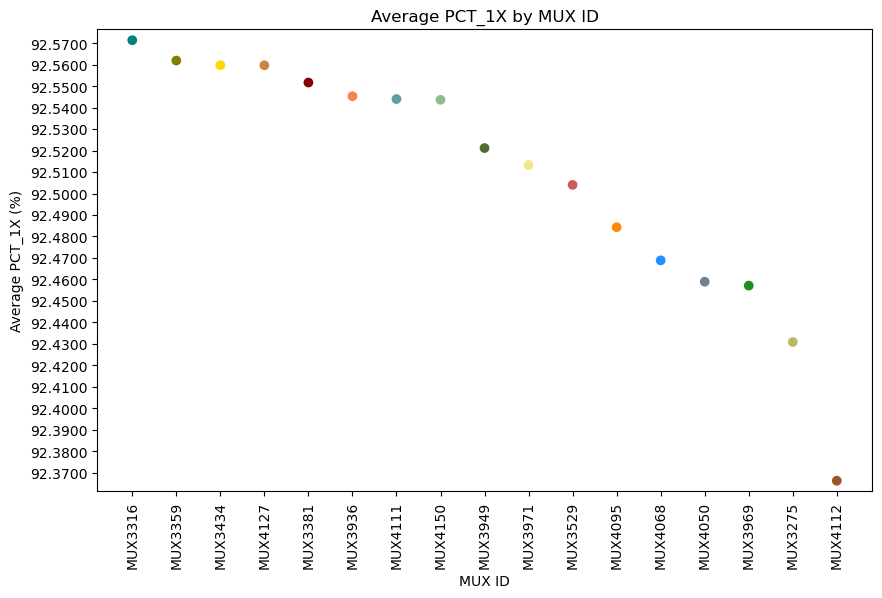

In [17]:
# Assign each column a different color
colors = ['teal', 'olive','gold','peru','darkred','coral','cadetblue','darkseagreen','darkolivegreen','khaki', 'indianred',
          'darkorange', 'dodgerblue','slategrey','forestgreen','darkkhaki','sienna']
                       
# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df_mean["mux_id"], df_mean["pct_1x"], color=colors[:len(df_mean)], marker='o')
ax.set_xlabel("MUX ID")
ax.set_ylabel("Average PCT_1X (%)")
ax.set_title("Average PCT_1X by MUX ID")


#Set the range
mean_group_max = df_mean["pct_1x"].max()
mean_group_min = df_mean["pct_1x"].min()
y_range = [mean_group_min - 0.005, mean_group_max + 0.005]
ax.set_ylim(y_range)

# Set the y-axis to display 4 decimal points
ax.yaxis.set_major_formatter('{:.4f}'.format)

# Set the interval of the y-axis 
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))

# Rotate x-axis labels 
plt.xticks(rotation=90)

plt.show()

### Step 4 - From a biological standpoint, can you explain the resulting plot?

The bar chart displays the average mean of the PCT_1X value for each MXT_ID, which is a metric used to measure the percentage of the genomic code that has been read at least once, indicating the completeness of the sequencing data for a given sample. The MXT_ID variable represents the identifier for the genomic region being sequenced. The plot shows which genomic regions have high or low coverage depth. High coverage depth indicates more thorough sequencing of a genomic region, while low coverage depth may have gaps or errors due to incomplete sequencing. It shows that MUX3316 has the highest average PCT_1x value, indicating that this genomic region has been more thoroughly sequenced than others. In contrast, MXT4112 has the lowest average PCT_1x value, indicating that this genomic region may have gaps or errors due to low sequencing coverage. By identifying regions with low coverage depth, we can determine which areas need additional sequencing to obtain accurate results.

The summary statistics for the average PCT_1X values provide additional insights into the distribution of sequencing coverage depth. The mean of 92.5084% suggests that the coverage depth for each group of MXT_ID values is relatively consistent. The  standard deviation of 0.2663 suggests that the PCT_1X values for each group of MXT_ID values are tightly clustered around the mean value. Overall, this plot is valuable for optimizing sequencing experiments and assessing the quality of sequencing data, which can have a significant impact on downstream analyses and interpretation of results.